# DEEP LEARNING IMAGES

Import libraries:

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 #import OpenCV -> pip install opencv-python
import numpy as np
import glob

Récuperer les données:

In [34]:
X = pd.read_csv('X_train_update.csv',index_col=0)
y = pd.read_csv('Y_train_CVw08PX.csv',index_col=0)

Liste des images:

In [35]:
import os #Miscellaneous operating system interfaces
#https://docs.python.org/3/library/os.html

#get current working directory
current_path = os.getcwd() 

#Training images path
images_path = current_path + r'/images/image_train/'

#List with the name of all training images
images_list = os.listdir(images_path)

Géneration nom des images:

In [36]:
#Create a column with the name of the picture
X['image name'] = 'image_' + X['imageid'].map(str) + '_product_' + X['productid'].map(str) + '.jpg'
X['image name']

0        image_1263597046_product_3804725264.jpg
1         image_1008141237_product_436067568.jpg
2          image_938777978_product_201115110.jpg
3           image_457047496_product_50418756.jpg
4         image_1077757786_product_278535884.jpg
                          ...                   
84911      image_941495734_product_206719094.jpg
84912    image_1188462883_product_3065095706.jpg
84913     image_1009325617_product_440707564.jpg
84914    image_1267353403_product_3942400296.jpg
84915       image_684671297_product_57203227.jpg
Name: image name, Length: 84916, dtype: object

In [6]:
#images_red = []
#images_pix = []
#for name in X_train['image name']:
#    img_grey = cv2.imread(images_path + name, cv2.IMREAD_GRAYSCALE)
#    images_red.append(img_grey)
    #images_pix.append(img_grey.ravel())

# SEPARER LES IMAGES PAR CATEGORIE

### ATTENTION! NE PAS UTILISER CETTE METHODE!

In [46]:
#CREATE A FOLDER PER CATEGORY

#list of categories
categories = list(set(y['prdtypecode'].to_list()))

#create a folder per category inside images/images_train
for category in categories:
    os.mkdir('images/image_train/' + str(category))

In [24]:
#MOVE PICTURE TO ITS FOLDER CATEGORY

#Put image names and categories in lists
image_name_list = X['image name'].to_list()
category_list = y['prdtypecode'].to_list()

#move pictures from images/image_train to images/image_train/category
for image_name, category in zip(image_name_list, category_list):
    os.rename('images/image_train/' + image_name, 'images/image_train/' + str(category) + '/' + image_name)

### REVENIR EN ARRIÈRE

Le code préceédent ne permet pas de separer les images en trainig_set et test_set.

Le code ci-dessous permet de révenir en arrière et déplacer les images vers le dossier principale:

In [37]:
#MOVE IMAGES FROM CATEGORY FOLDER BACK TO THE MAIN FOLDER

#Put image names and categories in lists
image_name_list = X['image name'].to_list()
category_list = y['prdtypecode'].to_list()

#move pictures from images/image_train to images/image_train/category
for image_name, category in zip(image_name_list, category_list):
    os.rename('images/image_train/' + str(category) + '/' + image_name, 'images/image_train/' + image_name)

#REMOVE THE EMPTY CATEGORY FOLDERS

#list of categories
categories = list(set(y['prdtypecode'].to_list()))

#remove a folder per category inside images/images_train
for category in categories:
    os.rmdir('images/image_train/' + str(category))

### APPLIQUER CETTE MÉTHODE

Entrainer le modèle à chaque fois avec toutes les images est trop consomateur en temps. On va donc réduire la taille du dataset et n'utiliser qu'une partie des images afin de pouvoir aller plus rapide dans les prémières étapes:

In [89]:
from sklearn.model_selection import train_test_split

#Choisir la taille du dataset
dataset_size = 0.2 #20% des images

#Selectioner au hazard
X_train, X_set, y_train, y_set = train_test_split(X, y, test_size = dataset_size,random_state=42)

Une fois nous avons un dataset de la taille desirée on peut le séparer en train et test sets:

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size = 0.1,random_state=60)

Création d'un dossier training_set et test_set.

En plus, création d'un dossier par categorie dans chaque un des sets:

In [91]:
#CREATE A FOLDER PER CATEGORY FOR EACH SET

#List with the names of training and test sets
sets =['training_set','test_set'] 

for set_ in sets:
    
    #Create training_set folder
    os.mkdir('images/image_train/' + set_)

    #List of categories on a set
    if set_ == 'training_set':
        categories = list(set(y_train['prdtypecode'].to_list()))
    else:
        categories = list(set(y_test['prdtypecode'].to_list()))

    #Create a folder per category inside images/images_train
    for category in categories:
        os.mkdir('images/image_train/' + set_ + '/' + str(category))

Déplacer les images dans les dossiers créés précédement:

In [92]:
#MOVE EACH SET PICTURES TO ITS FOLDER CATEGORY

#List with the names of training and test sets
sets =['training_set','test_set'] 

for set_ in sets:
    
    #Put image names and categories in lists
    if set_ == 'training_set':
        image_name_list = X_train['image name'].to_list()
        category_list = y_train['prdtypecode'].to_list()
    else:
        image_name_list = X_test['image name'].to_list()
        category_list = y_test['prdtypecode'].to_list()
        
    #Move pictures from images/image_train to images/image_train/category
    for image_name, category in zip(image_name_list, category_list):
        os.rename('images/image_train/' + image_name, 'images/image_train/' + set_ + '/' + str(category) + '/' + image_name)

MON IDEE S'EST DE CRÉER UNE NOUVELLE FONCTION TRAIN_TEST_IMAGES_SPLIT QUI FACE EN UNE LIGNE DE CODE

### SI BESOIN UTILISER LE CODE CI-DESSOUS POUR REVENIR EN ARRIERE ET REMETTRE LES IMAGES DANS LE DOSSIER INITIAL

In [87]:
#MOVE IMAGES FROM CATEGORY FOLDER BACK TO THE MAIN FOLDER

import shutil

#List with the names of training and test sets
sets =['training_set','test_set'] 

for set_ in sets:
    
    #list all category folders inside the set_ folder
    category_list = os.listdir('images/image_train/' + set_)

    for category in category_list:

        #List with the name of all training images in the folder
        images_list = os.listdir('images/image_train/' + set_ + '/' + str(category))

        for image_name in images_list:
            
            #move picture back to images/image_train/
            os.rename('images/image_train/' + set_ + '/' + str(category) + '/' + image_name, 'images/image_train/' + image_name)
    
    #Removes set_ folders
    shutil.rmtree('images/image_train/' + set_)

# TRANSFORMATION DES DONNÉES

In [93]:
#APPLY SOME TRANSFORMATIONS TO DATA

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('images/image_train/training_set',
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('images/image_train/test_set', 
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 15285 images belonging to 27 classes.
Found 1699 images belonging to 27 classes.


Afficher resultats transformation:

Found 98728 images belonging to 2 classes.
Found 98728 images belonging to 2 classes.


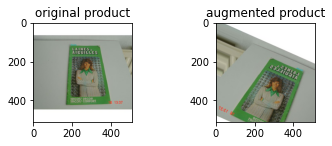

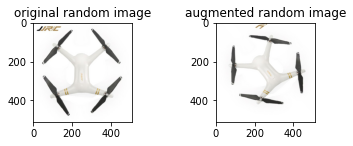

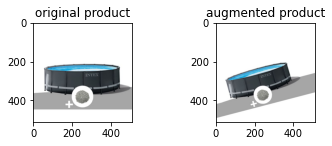

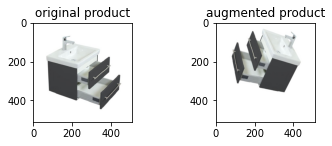

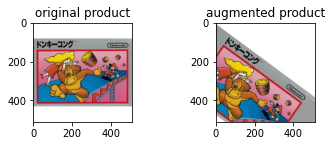

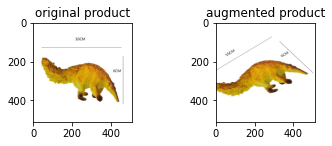

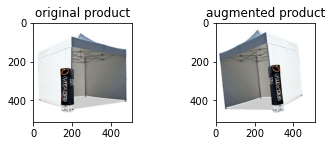

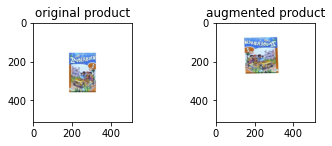

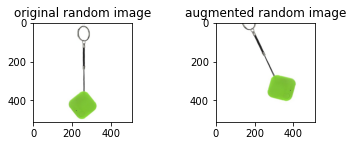

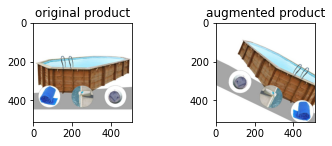

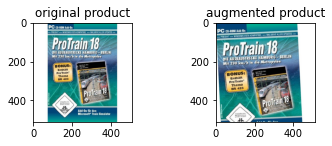

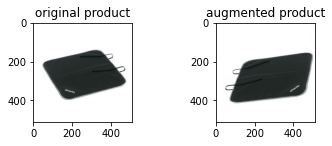

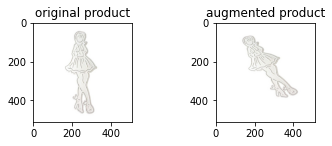

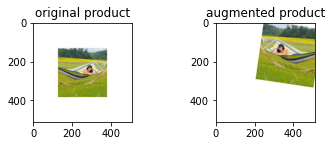

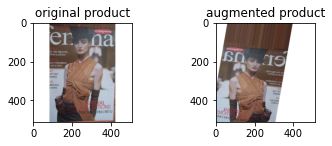

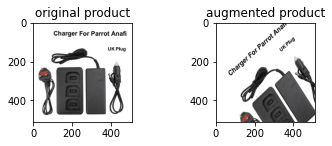

In [94]:
import matplotlib.pyplot as plt

%matplotlib inline

batches_real = test_datagen.flow_from_directory('images', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)
batches_augmented = train_datagen.flow_from_directory('images', target_size = (512, 512), batch_size = 16, class_mode = 'categorical', seed=1234)

x_batch_augmented, y_batch_augmented = next(batches_augmented)
x_batch_real, y_batch_real = next(batches_real)

for i in range(16):

    image_augmented = x_batch_augmented[i]
    image_real = x_batch_real[i]

    title_add_on = "random image"

    if y_batch_augmented[i][1]: title_add_on =  "product"

    plt.subplot(221)
    plt.imshow(image_real)
    plt.title("original " + title_add_on)
    plt.subplot(222)
    plt.imshow(image_augmented)
    plt.title("augmented " + title_add_on)
    plt.show()

# IMPLEMENTATION DU MODELE

In [95]:
#MODEL IMPLEMENTATION

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout 
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D 
from keras.layers.convolutional import MaxPooling2D

conv_1 = Conv2D(filters = 32,                    # Nombre de filtres
                kernel_size = (5, 5),            # Dimensions du noyau
                padding = 'valid',               # Mode de Dépassement
                input_shape = (64, 64, 3),       # Dimensions de l'image en entrée
                activation = 'tanh')             # Fonction d'activation

max_pool_1 = MaxPooling2D(pool_size = (2, 2))

conv_2 = Conv2D(filters = 32,                    
                kernel_size = (3, 3),
                padding = 'valid',
                activation = 'relu')

max_pool_2 = MaxPooling2D(pool_size = (2, 2))
flatten = Flatten()
dense_1 = Dense(units = 128, activation = 'tanh')
dense_2 = Dense(units = 27, activation = 'softmax')

classifier = Sequential()

classifier.add(conv_1)
classifier.add(max_pool_1)
classifier.add(conv_2)
classifier.add(max_pool_2)
classifier.add(flatten)
classifier.add(dense_1)
classifier.add(dense_2)

In [96]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_9 (Dense)              (None, 27)               

# ENTRAINEMENT DU MODÈLE

A corriger:

In [97]:
classifier.compile(loss='categorical_crossentropy', # fonction de perte
                   optimizer='adam',                # algorithme d'optimisation
                   metrics=['accuracy'])            # métrique d'évaluation

history = classifier.fit_generator(generator=training_set, 
                                   epochs = 20,
                                   validation_data = test_set)

Epoch 1/20
478/478 [==============================] - 121s 251ms/step - loss: 3.0898 - accuracy: 0.1403 - val_loss: 2.9094 - val_accuracy: 0.1913
Epoch 2/20
478/478 [==============================] - 115s 241ms/step - loss: 2.9073 - accuracy: 0.1793 - val_loss: 2.8139 - val_accuracy: 0.2101
Epoch 3/20
478/478 [==============================] - 118s 247ms/step - loss: 2.8306 - accuracy: 0.1959 - val_loss: 2.7823 - val_accuracy: 0.2178
Epoch 4/20
478/478 [==============================] - 119s 250ms/step - loss: 2.7893 - accuracy: 0.2068 - val_loss: 2.9757 - val_accuracy: 0.1748
Epoch 5/20
478/478 [==============================] - 119s 249ms/step - loss: 2.7860 - accuracy: 0.2018 - val_loss: 2.9991 - val_accuracy: 0.1707
Epoch 6/20
478/478 [==============================] - 120s 251ms/step - loss: 2.7432 - accuracy: 0.2130 - val_loss: 2.6749 - val_accuracy: 0.2401
Epoch 7/20
478/478 [==============================] - 124s 258ms/step - loss: 2.6885 - accuracy: 0.2358 - val_loss: 2.8437 -

### TRANSFER LEARING

In [124]:
batch_size = 32

training_set = train_datagen.flow_from_directory('images/image_train/training_set',
                                                 target_size = (224, 224), 
                                                 batch_size = batch_size,
                                                  class_mode ="sparse")

test_set = test_datagen.flow_from_directory('images/image_train/test_set', 
                                            target_size = (224, 224),
                                            batch_size = batch_size,
                                             class_mode ="sparse")

Found 15285 images belonging to 27 classes.
Found 1699 images belonging to 27 classes.


In [125]:
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D

n_class = 27

# Modèle VGG16
base_model = VGG16(weights='imagenet', include_top=False) 
# Freezer les couches du VGG16
for layer in base_model.layers: 
    layer.trainable = False

model = Sequential()
model.add(base_model) # Ajout du modèle VGG16
model.add(GlobalAveragePooling2D()) 
model.add(Dense(1024,activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(27, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, None, None, 512)   14714688  
_________________________________________________________________
global_average_pooling2d_11  (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dropout_22 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 27)              

In [126]:
history = model.fit_generator(generator=training_set, 
                                epochs = 5,
                                steps_per_epoch = len(X_train)//batch_size,
                                validation_data = test_set,
                                validation_steps = len(X_test)//batch_size
                                )

Epoch 1/5
477/477 [==============================] - 2077s 4s/step - loss: 2.6841 - acc: 0.2240 - val_loss: 2.0968 - val_acc: 0.3974
Epoch 2/5
477/477 [==============================] - 2039s 4s/step - loss: 2.1632 - acc: 0.3638 - val_loss: 2.0288 - val_acc: 0.4051
Epoch 3/5
477/477 [==============================] - 2015s 4s/step - loss: 2.0659 - acc: 0.3829 - val_loss: 2.0060 - val_acc: 0.4039
Epoch 4/5
477/477 [==============================] - 2059s 4s/step - loss: 2.0107 - acc: 0.3958 - val_loss: 1.8773 - val_acc: 0.4404
Epoch 5/5
477/477 [==============================] - 2021s 4s/step - loss: 1.9387 - acc: 0.4206 - val_loss: 1.8719 - val_acc: 0.4481


In [127]:
#Defreezer
for layer in base_model.layers[-4:]:
    layer.trainable = True

In [131]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(generator=training_set, 
                                epochs = 5,
                                steps_per_epoch = len(X_train)//batch_size,
                                validation_data=test_set,
                                validation_steps=len(X_test)//batch_size
                                )

Epoch 1/5
477/477 [==============================] - 2710s 6s/step - loss: 2.0814 - accuracy: 0.3879 - val_loss: 1.7729 - val_accuracy: 0.4805
Epoch 2/5
477/477 [==============================] - 2671s 6s/step - loss: 1.7854 - accuracy: 0.4657 - val_loss: 1.6881 - val_accuracy: 0.4929
Epoch 3/5
477/477 [==============================] - 2655s 6s/step - loss: 1.6521 - accuracy: 0.5010 - val_loss: 1.6503 - val_accuracy: 0.5171
Epoch 4/5
477/477 [==============================] - 2682s 6s/step - loss: 1.5818 - accuracy: 0.5160 - val_loss: 1.7314 - val_accuracy: 0.4882
Epoch 5/5
477/477 [==============================] - 2651s 6s/step - loss: 1.4691 - accuracy: 0.5487 - val_loss: 1.6271 - val_accuracy: 0.5289


In [ ]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(lr=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit_generator(generator=training_set, 
                                epochs = 7,
                                steps_per_epoch = len(X_train)//batch_size,
                                validation_data=test_set,
                                validation_steps=len(X_test)//batch_size
                                )